## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Sat Sep 19 17:52:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 451.67       Driver Version: 451.67       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 105... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8    N/A /  N/A |     75MiB /  4096MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
from sklearn.preprocessing import MaxAbsScaler

def preproc_x(x, flatten=True):
    x = x / 255. 
    if flatten:
        x = x.reshape((len(x), -1))
    max_abs_scaler = MaxAbsScaler()  
    x = max_abs_scaler.fit_transform(x) 
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    


In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs - X 標準化 
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs - Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[2048, 1024, 512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 64)                8256

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 119us/step - loss: 2.1545 - accuracy: 0.1938 - val_loss: 1.9781 - val_accuracy: 0.2578
Epoch 2/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.9137 - accuracy: 0.2943 - val_loss: 1.8307 - val_accuracy: 0.3280
Epoch 3/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.7898 - accuracy: 0.3517 - val_loss: 1.7427 - val_accuracy: 0.3739
Epoch 4/100
50000/50000 [==============================] - 5s 99us/step - loss: 1.7034 - accuracy: 0.3848 - val_loss: 1.6645 - val_accuracy: 0.3922
Epoch 5/100
50000/50000 [==============================] - 5s 95us/step - loss: 1.6432 - accuracy: 0.4077 - val_loss: 1.5972 - val_accuracy: 0.4290
Epoch 6/100
50000/50000 [==============================] - 5s 96us/step - loss: 1.5847 - accuracy: 0.4317 - val_loss: 1.5626 - val_accuracy: 0.4409
Epoch 7/100
50000/50000 [==============================] - 

50000/50000 [==============================] - 5s 98us/step - loss: 0.3011 - accuracy: 0.8951 - val_loss: 2.6896 - val_accuracy: 0.5115
Epoch 56/100
50000/50000 [==============================] - 5s 91us/step - loss: 0.2686 - accuracy: 0.9078 - val_loss: 2.7018 - val_accuracy: 0.5173
Epoch 57/100
50000/50000 [==============================] - 5s 100us/step - loss: 0.2631 - accuracy: 0.9102 - val_loss: 2.8723 - val_accuracy: 0.5083
Epoch 58/100
50000/50000 [==============================] - 5s 101us/step - loss: 0.2487 - accuracy: 0.9158 - val_loss: 2.8232 - val_accuracy: 0.5233
Epoch 59/100
50000/50000 [==============================] - 5s 95us/step - loss: 0.2325 - accuracy: 0.9197 - val_loss: 2.9521 - val_accuracy: 0.5148
Epoch 60/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.2318 - accuracy: 0.9196 - val_loss: 3.0406 - val_accuracy: 0.5085
Epoch 61/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.2350 - accuracy: 0.9172 - val_loss

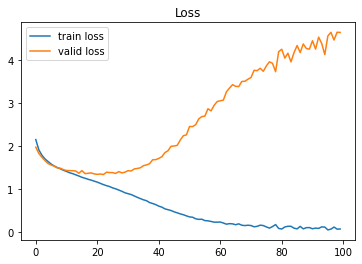

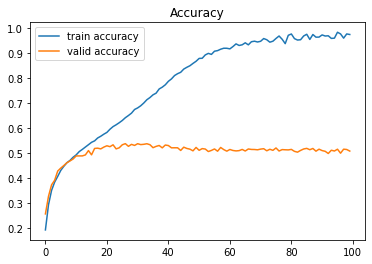

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()